# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df['gender'].fillna(2, inplace=True) #заполним пропущенный gender цифрой 2
gender = {'М':1, 'F':0, 2:2}
df['sex'] = df.gender.map(gender) #закодируем гендер, создав колонку sex
city_type = {'<100':1, '100-500':2, '500-1000':3, '1M+':4, 'Mega':5}
#создадим колонку c_type для упорядочивания размеров городов
df['c_type'] = df.city_type.map(city_type)

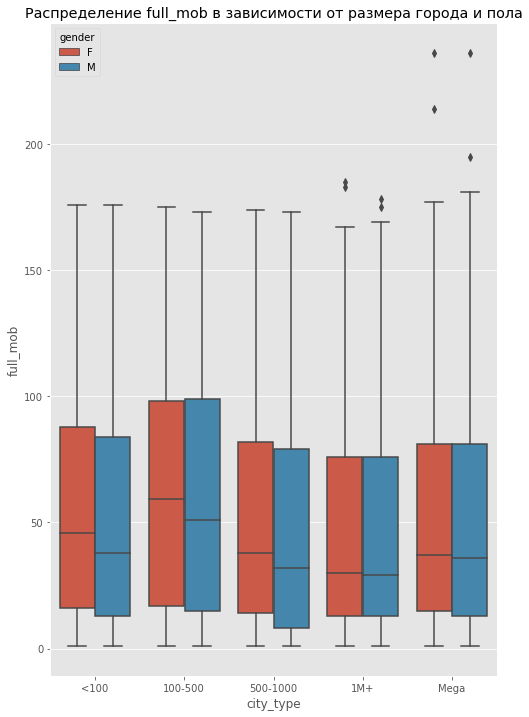

In [11]:
# посмотреть распределение длительности взаимоотношений с банком (full_mob)
# в зависимости от пола и типа города
plt.figure(figsize=(8,12))
sns.boxplot(x='city_type',
            y='full_mob',
            hue='gender',
            data=df.query('full_mob>0 and gender!=2').sort_values(by='c_type'))
plt.title('Распределение full_mob в зависимости от размера города и пола')
plt.show()
# вывод - женщины склонны к более длительным отношениям с банком (особонно вне мегаполисов),
# а также жители некрупных городов(100-500)

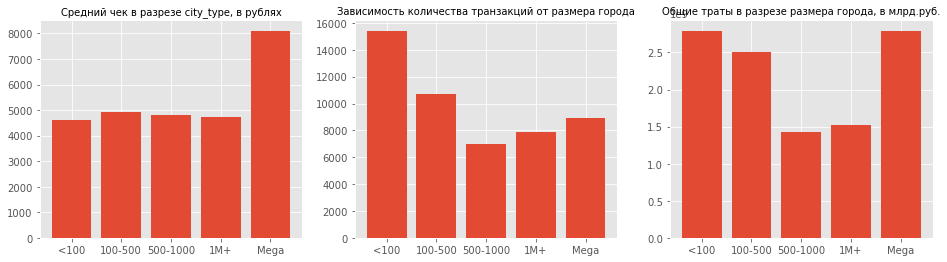

In [5]:
# изучить зависимости трат по картам от размера города (dc_trx_sum, dc_trx_cnt, Avg_trx, city_type)

agg_func = {'Avg_trx':'mean', 'dc_trx_sum':'sum', 'dc_trx_cnt':'count'}
ctc = df.groupby(['city_type', 'c_type']).agg(agg_func).reset_index().sort_values(by='c_type')

plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.bar(ctc.city_type, ctc.Avg_trx)
plt.title ("Средний чек в разрезе city_type, в рублях", fontsize=10)

plt.subplot(1, 3, 2)
plt.bar(ctc.city_type, ctc.dc_trx_cnt)
plt.title ("Зависимость количества транзакций от размера города", fontsize=10)

plt.subplot(1, 3, 3)
plt.bar(ctc.city_type, ctc.dc_trx_sum)
plt.title ("Общие траты в разрезе размера города, в млрд.руб.", fontsize=10)
plt.show()

# вывод - больше всего транзакций в маленьких городах,
# по размеру средней транцакции мегаполисы в сильном отрыве,
# общие траты концентрируются в маленьких городах и мегаполисах, средние города меньше транзачат

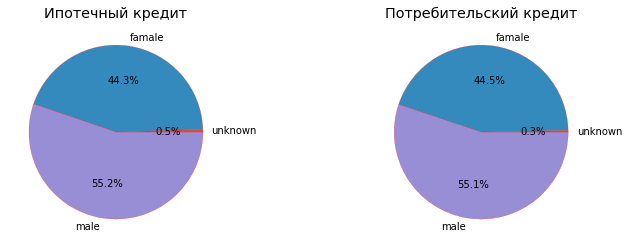

In [6]:
# гендерное распределение взятых кредитов
# кто больше оформляет потреб.кредитов, ипотек - ml_balance, cl_balance_0m, loan_balance_0m, gender

sum_x = lambda x: np.sum(x>0) #создаем функцию подсчета ненулевых строк
sum_x.__name__ = 'cnz' # для названия столбца делаем именование функции Count_Not_Zero
agg_func1 = {'ml_balance':sum_x, 'cl_balance_0m':sum_x}
#создаем датафрейм "количество взятых кредитов в зависимости от пола"
gl = df[['ml_balance', 'cl_balance_0m', 'gender']].groupby('gender').agg(agg_func1).reset_index()
gl.rename(columns={'ml_balance':'mortgage', 'cl_balance_0m':'consumer'}, inplace=True)

#отрисовываем графики
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
pie_x_ml = gl.mortgage.divide(gl.mortgage.sum())
pie_labels = ('unknown', 'famale', 'male')
plt.pie(pie_x_ml, labels=pie_labels, radius=1, autopct='%1.1f%%', wedgeprops={'lw':0.2, 'ls':'-','edgecolor':"r"})
plt.title('Ипотечный кредит')

plt.subplot(1, 2, 2)
pie_x_cl = gl.consumer.divide(gl.consumer.sum())
plt.pie(pie_x_cl, labels=pie_labels, radius=1, autopct='%1.1f%%', wedgeprops={'lw':0.2, 'ls':'-','edgecolor':"r"})
plt.title('Потребительский кредит')

plt.show()

# вывод - мужщины чаще берут кредиты (и ипотечные и потребительские)

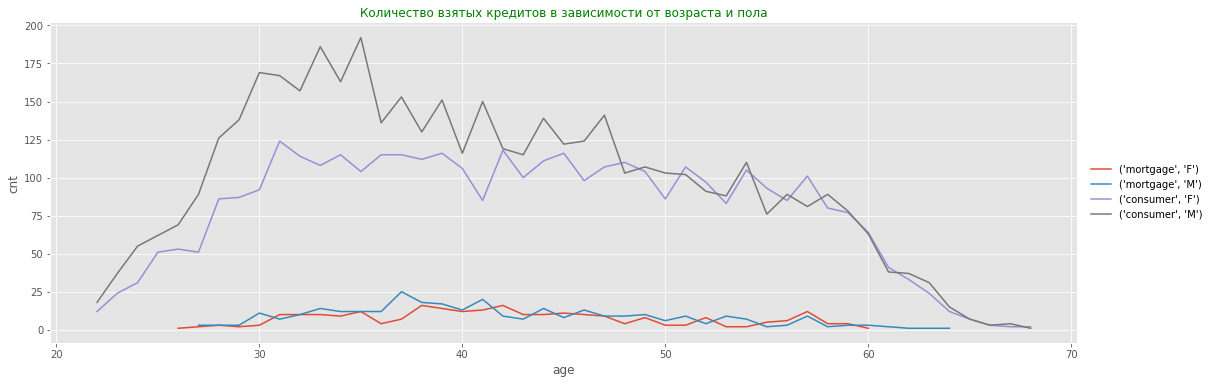

In [7]:
# гендерно-возрастное распределение взятых кредитов

# создаем датафрейм "количество взятых кредитов в зависимости от пола и возраста"
al = df[['ml_balance', 'cl_balance_0m', 'age', 'gender']].groupby(['age', 'gender']).agg(agg_func1).reset_index()
al.rename(columns={'ml_balance':'mortgage', 'cl_balance_0m':'consumer'}, inplace=True)
# из широкого df делаем длинный
long_al = pd.melt(al, var_name='loan', value_name='cnt', id_vars=['age', 'gender'])

sns.relplot(
    x='age', 
    y='cnt', 
    hue=long_al.query('gender!=2')[['loan', 'gender']].apply(tuple, axis=1),
    data=long_al.query("cnt > 0 and gender!=2"), kind='line', aspect=3)
plt.title('Количество взятых кредитов в зависимости от возраста и пола', size=20, color='g', fontsize=12)
plt.show()

# вывод - в молодом возрасте мужщины чаще берут потреб.кредиты, с возрастом проходит:))
# ипотеку так же, но после 54 лет немного вперед выходят женщины

In [8]:
# создать возрасные группы 18-25, 26-30, 31-40, 41-50, 51-65, 66-100
# изобразить уровень дохода банка по группам (можно еще посмотреть депозиты и доходы клиентов по группам)
# (age_bin, nbi, td_balance_0m, income)

bins_label = ['<18', '18-25', '26-30', '31-40', '41-50', '51-65', '>65']
cut_bins = [0, 18, 25, 30, 40, 50, 65, 100]
df['age_bin'] = pd.cut(df['age'], bins=cut_bins, labels=bins_label)

agg_func2 = {'income':['sum', sum_x], 'td_balance_0m':['sum', sum_x], 'nbi':['sum', sum_x]}
tdinc = df.query('gender!=2').groupby(['age_bin', 'gender']).agg(agg_func2).reset_index()
#собираем индексы колонок в один ярус
tdinc.columns = ["_".join(pair) if pair[1] != '' else pair[0] for pair in tdinc.columns]
#для тренировки и наглядности перевел все суммы в млн. руб. и округлил до 3 знака
list_sum = ['income_sum', 'td_balance_0m_sum', 'nbi_sum']
tdinc[list_sum] = tdinc[list_sum].divide(10**6).round(2)

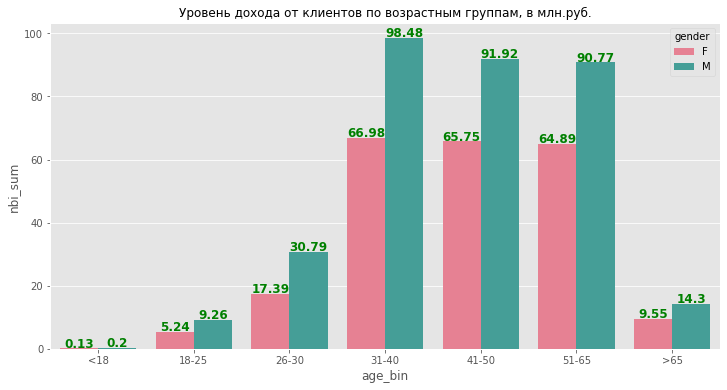

In [10]:
plt.figure(figsize=(12,6))
b = sns.barplot(
    x='age_bin', 
    y='nbi_sum', 
    data=tdinc,
    hue='gender',
    #estimator=sum, 
    palette='husl')
for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,5),
        textcoords='offset points', 
        color='g',
        weight='bold',
        fontsize=12
    )
plt.title('Уровень дохода от клиентов по возрастным группам, в млн.руб.', fontsize=12)
plt.show()

#вывод достаточно очевиден:) кто больше ипотек и кредитов набрал, с того доход и больше